In [27]:
# !pip3 install inscriptis
import numpy as np 
import pandas as pd
import os
import numpy as np
import re
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /home/ayush/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
cat_data = load_files(r"database_ml/")

In [29]:
X, y = cat_data.data, cat_data.target

In [30]:
# here are the labels of categories
cat_data.target_names

['Bulletins_news_magazine',
 'Education',
 'Entertainment',
 'Finance',
 'Fitness',
 'Food',
 'Fortune_Telling',
 'Forums',
 'Gamble',
 'Governments',
 'ISP',
 'Job_Portals',
 'Online_Shopping',
 'Porn',
 'Religion',
 'Science',
 'Sex_Education',
 'Social_Media',
 'Sports',
 'Travel',
 'Url_shortner_redirector',
 'VPN',
 'Weapons',
 'WebTV',
 'Webmails',
 'Webphones',
 'alcohol',
 'automobiles',
 'chatting',
 'dating',
 'healthcare',
 'piracy_movies_softwares']

In [31]:
documents = []

from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()

for sen in range(0, len(X)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split()

    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    documents.append(document)

In [40]:
#sample of element in documents after data preprocessing
sample_txt = documents[0]
sample_category = y[0]
print(sample_txt)
print("-"*50)
print("Above sample belongs to", cat_data.target_names[sample_category])

vpn broadcaster backhaul domain local blacklist router uplink control smes isp last voip modem information phishing piracy intranet infringers server military ftp optic censor subscriber botnet memory mpaa dhcp firewall censorship wideband provider digital dsl fcc cybercrime neutrality broadband smtp telephony isdn network aol newsgroups mile hacker subscriber dns wide area protocol network usenet landline qos spam mbps network ddos company subnets vpns multicast unicast censorship line adsl resellers unit telecommunication computer webmail transmission regulator sender information pstn tcp subdomain megabit area ethernet measure telecom fiber telnet cable internet bandwidth spammer zufolo superhighway narrowband bittorrent telephone reseller subnet
--------------------------------------------------
Above sample belongs to ISP


In [41]:
#split the data into train-test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state = 0)

In [42]:
#Using TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,stop_words='english')

In [43]:
fitted_vectorizer = tfidf.fit(X_train)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(X_train)

In [44]:
##Model selection by comparing the accuracy
#Using LinearSVC 
from sklearn.svm import LinearSVC
model = LinearSVC().fit(tfidf_vectorizer_vectors, y_train)

#Using MultinomialNB 
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(tfidf_vectorizer_vectors, y_train)

#Using LogisticRegression 
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=0).fit(tfidf_vectorizer_vectors, y_train)

#Using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rand_for = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0).fit(tfidf_vectorizer_vectors, y_train)


In [63]:

y_pred =model.predict(fitted_vectorizer.transform(X_test))

y_pred_clf = clf.predict(fitted_vectorizer.transform(X_test))

y_pred_lr = log_reg.predict(fitted_vectorizer.transform(X_test))

y_pred_rand = rand_for.predict(fitted_vectorizer.transform(X_test))


In [64]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("accuracy with LinearSVC: ",accuracy_score(y_test, y_pred)*100,"%")
print("accuracy with MultinomialNB: ",accuracy_score(y_test, y_pred_clf)*100,"%")
print("accuracy with LogisticRegression: ",accuracy_score(y_test, y_pred_lr)*100,"%")
print("accuracy with RandomForestClassifier: ",accuracy_score(y_test, y_pred_rand)*100,"%")
# As per the accuracy count - SVC is the best suitable model,  hence proved

accuracy with LinearSVC:  100.0 %
accuracy with MultinomialNB:  98.82697947214076 %
accuracy with LogisticRegression:  98.82697947214076 %
accuracy with RandomForestClassifier:  60.997067448680355 %


In [65]:
models_list = [model,clf,log_reg,rand_for]
new_complaint = """booze it today"""
for i in models_list:
    category_predicted=i.predict(fitted_vectorizer.transform([new_complaint]))
    print(cat_data.target_names[int(category_predicted)])

alcohol
alcohol
alcohol
Bulletins_news_magazine


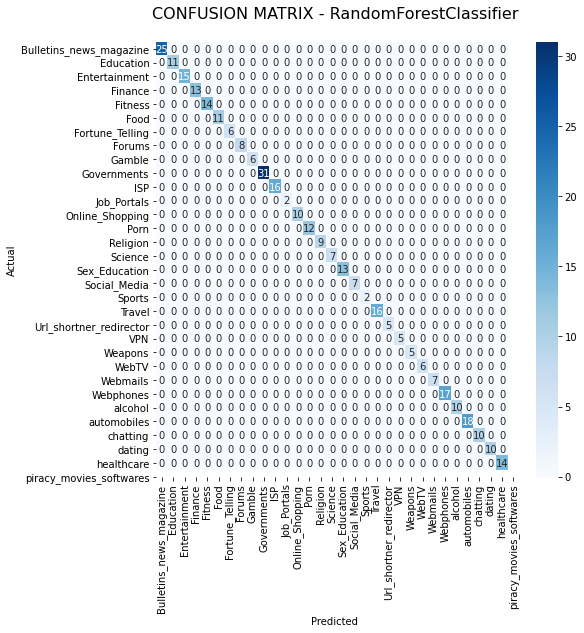

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=cat_data.target_names, 
            yticklabels=cat_data.target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - RandomForestClassifier\n", size=16);

In [68]:
new_prediction = ["booze it today",
                 "As per Ganesha, you will be heading towards something big this year.",
                 "Leap forward in your Tech career with Edureka's expert-led tech certification courses. Take charge of your career & get the promotion you want by enrolling in Edureka courses!",
                "Flipkart is an Indian e-commerce company based in Bangalore, Karnataka, India. It was founded by Sachin Bansal and Binny Bansal in 2007",
                "Kejriwal requested AAP volunteers, supporters and people to donate oximeters for rural areas, saying that most of the coronavirus patients die due to lack of oxygen.",
                "The Times Now is a 24-hour English news channel in India owned and operated by The Times Group. The channel launched on 23 January 2006 in partnership with Reuters. It is a pay television throughout India. Until 2016, it was India's most popular and most viewed English news channel with Arnab Goswami as the anchor.",
                "Bharti Airtel Limited, also known as Airtel, is an Indian global telecommunications services company based in New Delhi",
                "with all kinds of sexual pleasures, presented in hard and not very clips home porn, amateur porn and professional pornstar! Jerks off on health!",
                "nstruction of issues relating to human sexuality, including emotional relations and responsibilities, human sexual anatomy, sexual activity,",
                 "transforming long, ugly links into nice, memorable and trackable short URLs. Use it to shorten links.",
                 " the company provides online travel services including flight tickets, domestic and international holiday packages, hotel reservations, rail, and bus tickets.",
                 "Buy online Clothing, Footwear & Accessories at best prices. Huge collection & premium brands available"]
for i in new_prediction:
    category_predicted=model.predict(fitted_vectorizer.transform([i]))
    print(cat_data.target_names[int(category_predicted)])

alcohol
Fortune_Telling
Education
Online_Shopping
Bulletins_news_magazine
Bulletins_news_magazine
ISP
Porn
Sex_Education
Url_shortner_redirector
Travel
Online_Shopping


In [97]:
# import urllib.request
# from inscriptis import get_text

# url = input("Enter URL: ")

# try:
#     html = urllib.request.urlopen(url).read().decode('utf-8')
#     text = get_text(html)
#     extracted_data=text.split()
#     refined_data=[]
#     SYMBOLS = '{}()[].,:;+-*/&|<>=~0123456789' 
#     for i in extracted_data:
#         if i not in SYMBOLS:
#             refined_data.append(i)
#     predict_this=" ".join(refined_data)
    
#     for i in models_list:
#         category_predicted=i.predict(fitted_vectorizer.transform([predict_this]))
#         print("-"*100)
#         print("Predicted by ",i,": ",cat_data.target_names[int(category_predicted)])
    
# except:
#     print("-"*100)
#     print("SORRY....Couldn't Scrap")

Enter URL: https://www.facebook.com/
----------------------------------------------------------------------------------------------------
Predicted by  LinearSVC() :  chatting
----------------------------------------------------------------------------------------------------
Predicted by  MultinomialNB() :  Bulletins_news_magazine
----------------------------------------------------------------------------------------------------
Predicted by  LogisticRegression(random_state=0) :  Bulletins_news_magazine
----------------------------------------------------------------------------------------------------
Predicted by  RandomForestClassifier(max_depth=3, n_estimators=200, random_state=0) :  Bulletins_news_magazine


In [91]:
len(cat_data.target_names)

32

In [104]:
import urllib.request
from inscriptis import get_text

import requests
import random
user_agent_list = [
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/13.1.1 Safari/605.1.15',
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:77.0) Gecko/20100101 Firefox/77.0',
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36',
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:77.0) Gecko/20100101 Firefox/77.0',
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36',
]



url = input("Enter URL: ")

for i in range(1,4):
    #Pick a random user agent
    user_agent = random.choice(user_agent_list)
    #Set the headers 
    headers = {'User-Agent': user_agent}
    print(headers)
    #Make the request
    response = requests.get(url,headers={'User-Agent': 'Mozilla/5.0'})
    html = urllib.request.urlopen(url).read().decode('utf-8')
    text = get_text(html)
    extracted_data=text.split()
    refined_data=[]
    SYMBOLS = '{}()[].,:;+-*/&|<>=~0123456789' 
    for i in extracted_data:
        if i not in SYMBOLS:
            refined_data.append(i)
    predict_this=" ".join(refined_data)

for i in models_list:
    category_predicted=i.predict(fitted_vectorizer.transform([predict_this]))
    print("-"*100)
    print("Predicted by ",i,": ",cat_data.target_names[int(category_predicted)])

# except:
#     print("-"*100)
#     print("SORRY....Couldn't Scrap")

Enter URL: https://www.naukri.com/
{'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/13.1.1 Safari/605.1.15'}


HTTPError: HTTP Error 403: Forbidden